#1 Delivery_time -> Predict delivery time using sorting time
#X=Sorting time
#Y= Delivery time

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [201]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [202]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [203]:
data.shape

(21, 2)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [205]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [206]:
data=data.rename({'Delivery Time': 'Y', 'Sorting Time' : 'X'}, axis=1)
data.head()

,Y,X
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [207]:
data.isnull().sum()

Y    0
X    0
dtype: int64

In [208]:
data['X'].max()

10

(array([1., 3., 3., 1., 3., 4., 1., 5.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 8 artists>)

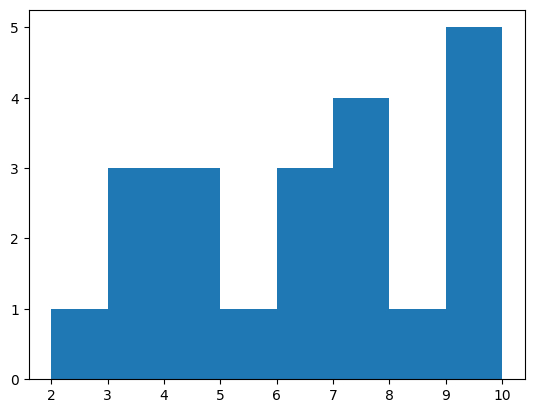

In [209]:
plt.hist(data['X'], bins=8)

<ipython-input-210-ed3687b03fc5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['X'])


<Axes: xlabel='X', ylabel='Density'>

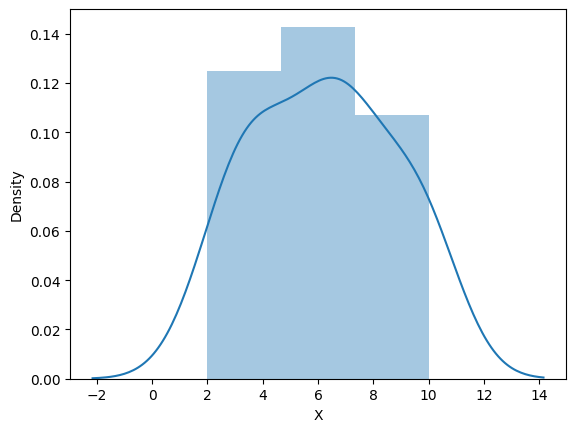

In [210]:
sns.distplot(data['X'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb915549030>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb915549b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb9155489a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb91554a710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb915549d50>],
 'means': []}

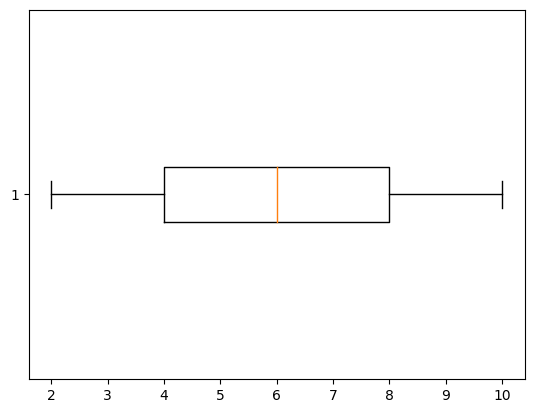

In [211]:
plt.boxplot(data['X'], 0,'rs',0)

(array([2., 3., 4., 4., 5., 1., 1., 1.]),
 array([ 8.   , 10.625, 13.25 , 15.875, 18.5  , 21.125, 23.75 , 26.375,
        29.   ]),
 <BarContainer object of 8 artists>)

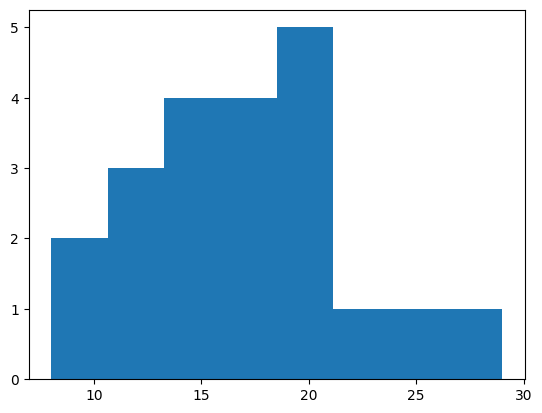

In [212]:
plt.hist(data['Y'], bins=8)

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb9155db100>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb9155d9a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb9155da1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb9155dbeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb9155da170>],
 'means': []}

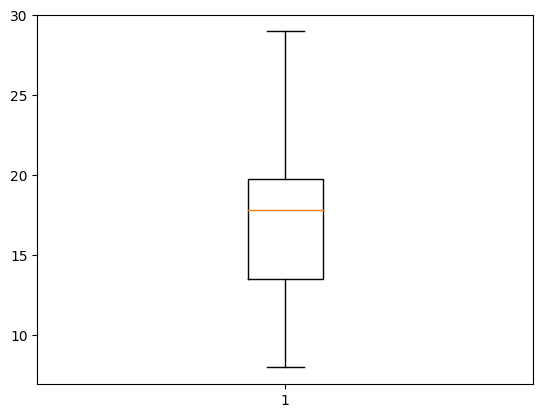

In [213]:
plt.boxplot(data['Y'])

<ipython-input-214-102626f57b1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Y'])


<Axes: xlabel='Y', ylabel='Density'>

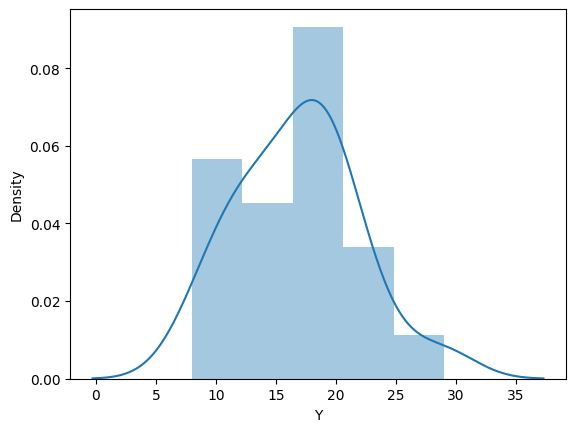

In [214]:
sns.distplot(data['Y'])

In [215]:
data['X'].skew()

0.047115474210530174

In [216]:
data['Y'].skew()

0.3523900822831107

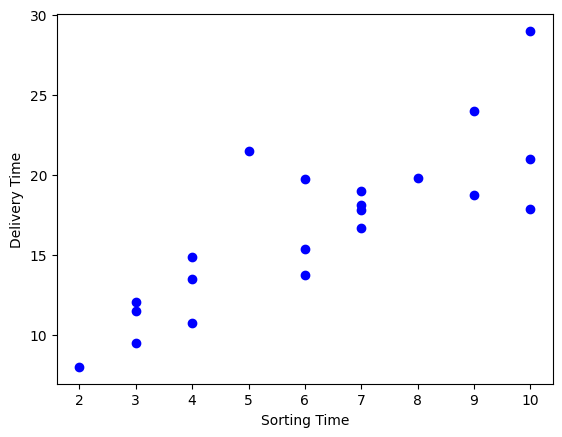

In [217]:
plt.plot(data['X'], data['Y'], 'bo')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [218]:
data.corr()

,Y,X
Y,1.000000,0.825997
X,0.825997,1.000000


In [219]:
data['Y'].corr(data['X'])

0.8259972607955326

<Axes: xlabel='X', ylabel='Y'>

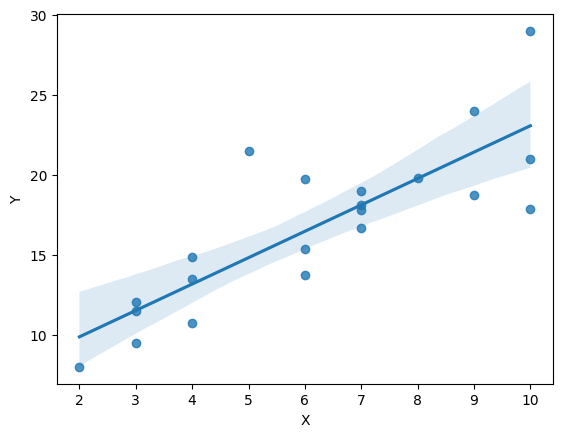

In [220]:
#building simple linear regression model
import statsmodels.formula.api as smf
model=smf.ols('Y~X', data=data).fit()
sns.regplot(x='X', y='Y', data=data)

In [221]:
model.params

Intercept    6.582734
X            1.649020
dtype: float64

In [222]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        18:07:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
X              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [224]:
pred=model.fittedvalues
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'Delivery time')

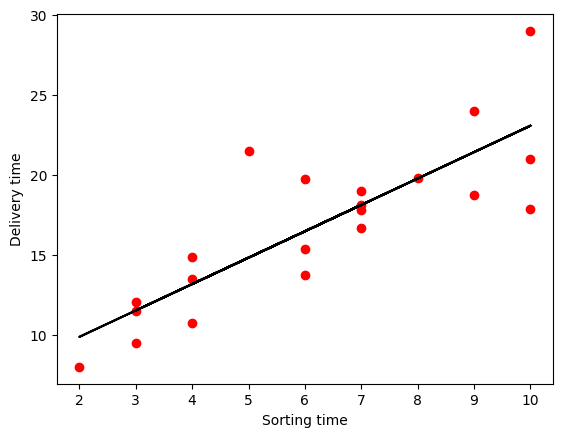

In [225]:
plt.scatter(x='X', y='Y', data=data, color='red');
plt.plot(data.X, pred, color='black');
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [226]:
pred.corr(data.Y)

0.8259972607955325

In [227]:
#transforming variables for accuracy
data['logX']=np.log(data.X)
data.head()

,Y,X,logX
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [228]:
model2=smf.ols('Y~logX', data=data).fit()
model2.params

Intercept    1.159684
logX         9.043413
dtype: float64

In [229]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           2.64e-06
Time:                        18:07:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
logX           9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
pred2=model2.predict(data.logX)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [231]:
pred2.corr(data.Y)

0.8339325279256242

Text(0, 0.5, 'Delivery time')

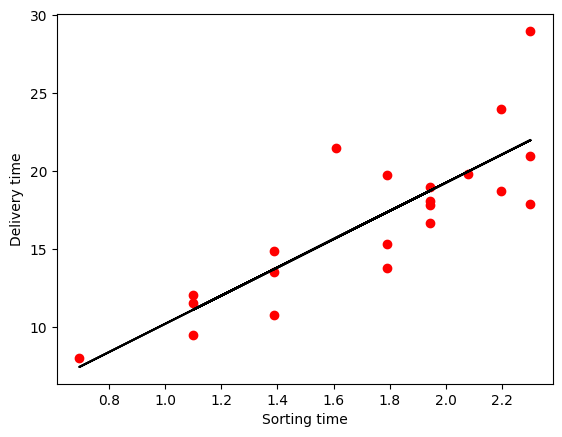

In [232]:
plt.scatter(x=data.logX, y=data.Y, color='red');
plt.plot(data.logX, pred2, color='black')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [233]:
#by squaring x
data['X_square']= np.power(data.X, 2)
data['srt_X'] = np.power(data.X, 1/2)
data.head()


,Y,X,logX,X_square,srt_X
0,21.00,10,2.302585,100,3.162278
1,13.50,4,1.386294,16,2.000000
2,19.75,6,1.791759,36,2.449490
3,24.00,9,2.197225,81,3.000000
4,29.00,10,2.302585,100,3.162278


<ipython-input-234-e51d42bee6c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.logX)


<Axes: xlabel='logX', ylabel='Density'>

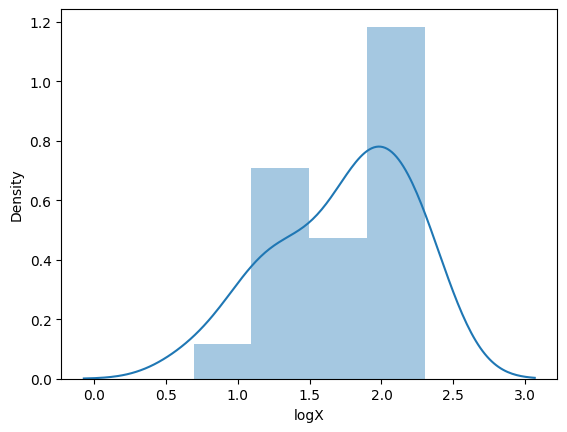

In [234]:
sns.distplot(data.logX)

In [235]:
data.logX.skew()

-0.6052357185134765

In [236]:
model3= smf.ols('Y~X_square', data=data).fit()
model3.params

Intercept    11.237205
X_square      0.124870
dtype: float64

In [237]:
(model3.rsquared, model3.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [238]:
pred3 = model3.predict(data.X_square)
pred3

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

<Axes: xlabel='X_square', ylabel='Y'>

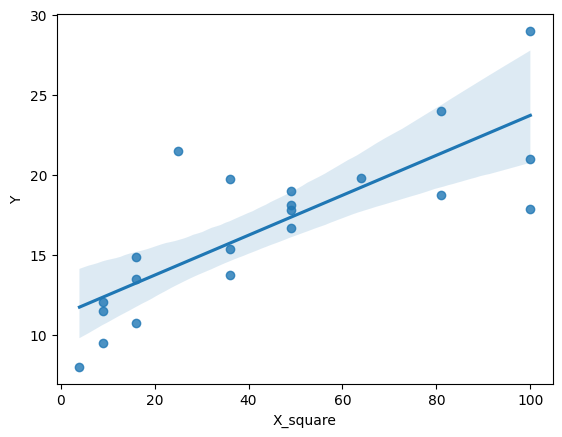

In [239]:
sns.regplot(x='X_square', y='Y', data=data)

In [240]:
model4 = smf.ols('Y~srt_X', data=data).fit()
model4.params

Intercept   -2.518837
srt_X        7.936591
dtype: float64

In [241]:
(model4.rsquared, model4.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [242]:
pred4= model4.predict(data.srt_X)
pred4.corr(data.Y)

0.8341500030755061

<Axes: xlabel='srt_X', ylabel='Y'>

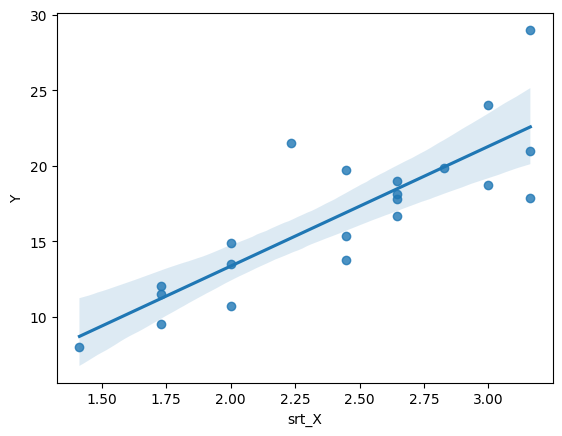

In [243]:
sns.regplot(x='srt_X', y='Y', data=data)

In [244]:
data.srt_X.skew()

-0.25981634723613994

<ipython-input-245-166470a50519>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.srt_X)


<Axes: xlabel='srt_X', ylabel='Density'>

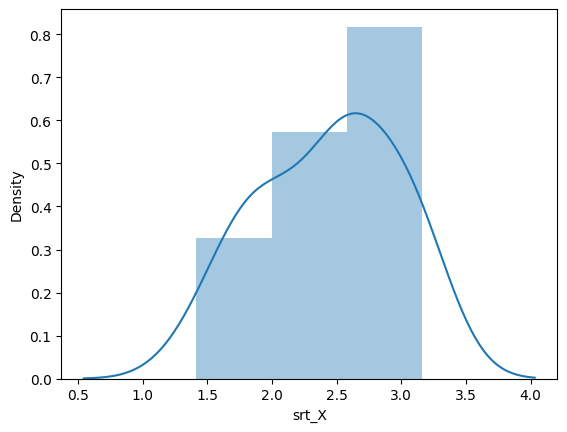

In [245]:
sns.distplot(data.srt_X)

# using LinearRegression From sklearn

In [246]:
from sklearn.linear_model import LinearRegression

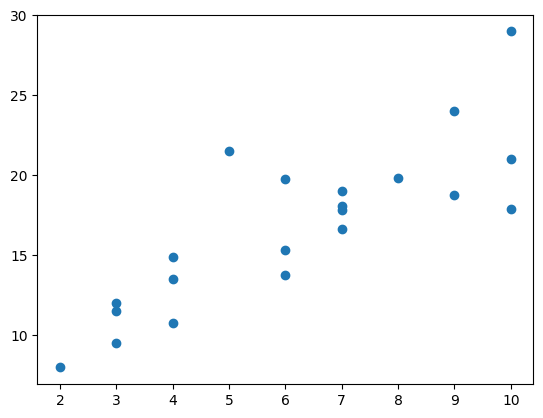

In [247]:
plt.scatter(data.X, data.Y)

In [248]:
modelR1= LinearRegression()
modelR1.fit(data.X.values.reshape(-1,1),data.Y)
predR1= modelR1.predict(data.X.values.reshape(-1,1))

In [249]:
modelR1.score(data.X.values.reshape(-1,1), data.Y)

0.6822714748417231

In [250]:
rmse1=np.sqrt(np.mean((predR1-data.Y)**2))
rmse1

2.7916503270617654

In [251]:
print(modelR1.coef_)
print(modelR1.intercept_)

[1.6490199]
6.58273397199706


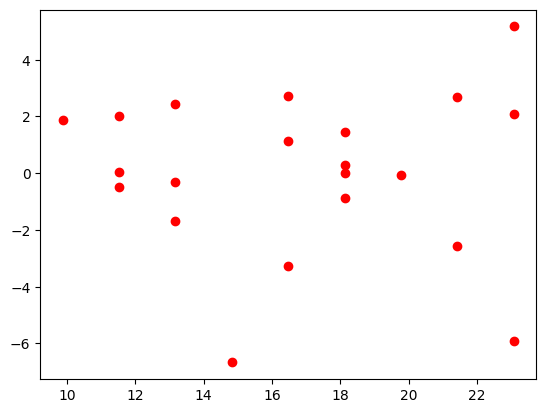

In [252]:
plt.scatter(predR1, (predR1-data.Y), c='r')

(array([1., 0., 6., 2., 6., 2., 1., 1., 0., 2.]),
 array([-5.17293294, -3.98842299, -2.80391304, -1.6194031 , -0.43489315,
         0.7496168 ,  1.93412675,  3.1186367 ,  4.30314665,  5.4876566 ,
         6.67216654]),
 <BarContainer object of 10 artists>)

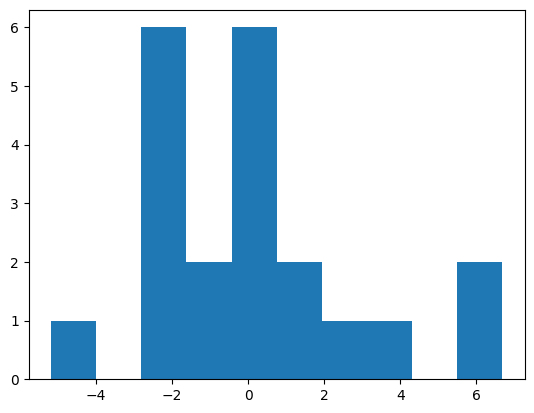

In [253]:
#checking for normal distributuin of residuals
plt.hist(data.Y - predR1)

In [254]:
data.head()

,Y,X,logX,X_square,srt_X
0,21.00,10,2.302585,100,3.162278
1,13.50,4,1.386294,16,2.000000
2,19.75,6,1.791759,36,2.449490
3,24.00,9,2.197225,81,3.000000
4,29.00,10,2.302585,100,3.162278


In [255]:
modelR2= LinearRegression()
modelR2.fit(data.srt_X.values.reshape(-1,1), data.Y)
predR2= modelR2.predict(data.srt_X.values.reshape(-1,1))

In [256]:
modelR2.score(data.srt_X.values.reshape(-1,1), data.Y)

0.695806227630867

In [257]:
rmse2= np.sqrt(np.mean((data.Y - predR2)**2))
rmse2

2.731543210091211

In [258]:
print(modelR2.intercept_)
print(modelR2.coef_)

-2.518836615838879
[7.93659075]


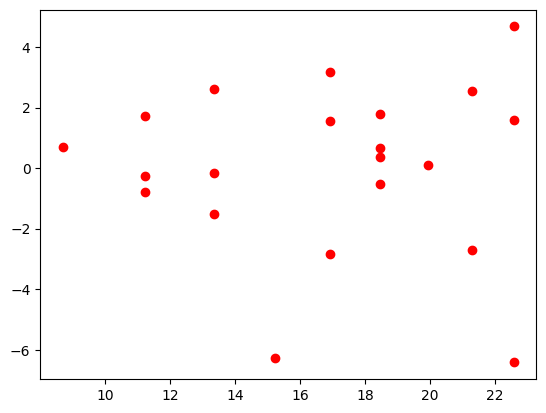

In [259]:
plt.scatter(predR2, (predR2-data.Y), c='r')

(array([1., 3., 4., 3., 5., 1., 2., 0., 0., 2.]),
 array([-4.67886702, -3.56886702, -2.45886702, -1.34886702, -0.23886702,
         0.87113298,  1.98113298,  3.09113298,  4.20113298,  5.31113298,
         6.42113298]),
 <BarContainer object of 10 artists>)

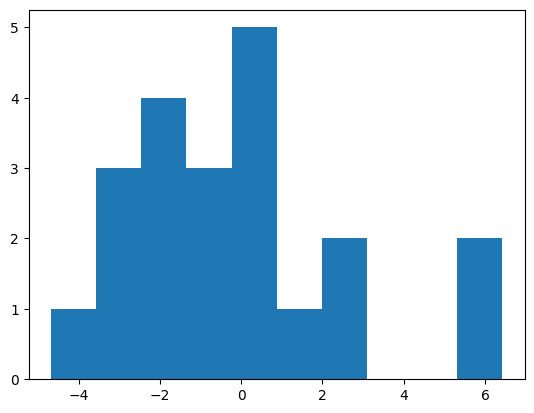

In [260]:
plt.hist(data.Y -predR2 )

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-6.42113298, -6.27208018, -2.82823898, -2.70906436, -1.52565511,
         -0.80225819, -0.52059123, -0.27225819, -0.14565511,  0.09923195,
          0.36940877,  0.64940877,  0.70519766,  1.57176102,  1.57886702,
          1.72774181,  1.79940877,  2.54093564,  2.60434489,  3.17176102,
          4.67886702])),
 (2.8277421149252087, 4.2790007678980606e-15, 0.9607238141294331))

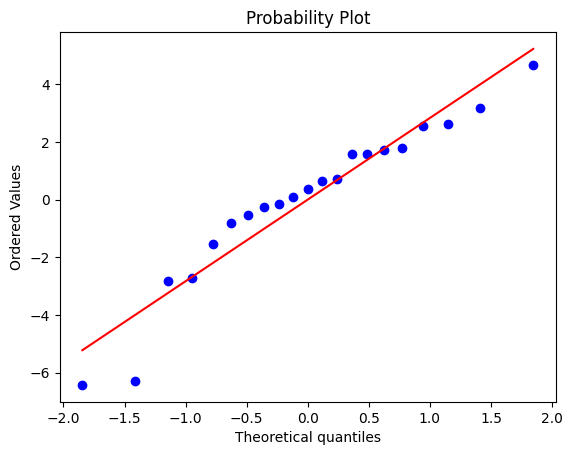

In [261]:
import pylab
import scipy.stats as st
st.probplot(predR2-data.Y,dist="norm",plot=pylab)

In [262]:
#applying transformation on dependent variable
data['sqrt_y']=np.sqrt(data.Y)
data.head()

,Y,X,logX,X_square,srt_X,sqrt_y
0,21.00,10,2.302585,100,3.162278,4.582576
1,13.50,4,1.386294,16,2.000000,3.674235
2,19.75,6,1.791759,36,2.449490,4.444097
3,24.00,9,2.197225,81,3.000000,4.898979
4,29.00,10,2.302585,100,3.162278,5.385165


In [263]:
modelR3 = LinearRegression()
modelR3.fit(data.X.values.reshape(-1,1),data.sqrt_y )
predR3 = modelR3.predict(data.X.values.reshape(-1,1))

In [264]:
predR3

array([4.83904922, 3.59925831, 4.01252195, 4.6324174 , 4.83904922,
       4.01252195, 4.21915377, 3.39262649, 4.83904922, 4.6324174 ,
       4.42578558, 3.59925831, 4.21915377, 3.39262649, 3.39262649,
       3.59925831, 4.01252195, 4.21915377, 3.18599468, 4.21915377,
       3.80589013])

In [265]:
predR3=predR3**2
predR3

array([23.41639735, 12.95466039, 16.10033238, 21.45929098, 23.41639735,
       16.10033238, 17.8012585 , 11.50991452, 23.41639735, 21.45929098,
       19.58757803, 12.95466039, 17.8012585 , 11.50991452, 11.50991452,
       12.95466039, 16.10033238, 17.8012585 , 10.15056207, 17.8012585 ,
       14.48479968])

In [266]:
modelR3.score(data.X.values.reshape(-1,1), data.sqrt_y)

0.704049871541756

In [267]:
print(modelR3.intercept_)
print(modelR3.coef_)

2.7727310393450333
[0.20663182]


In [268]:
rmse3= np.sqrt(np.mean((data.sqrt_y - predR3)**2))
rmse3

13.154594562143862

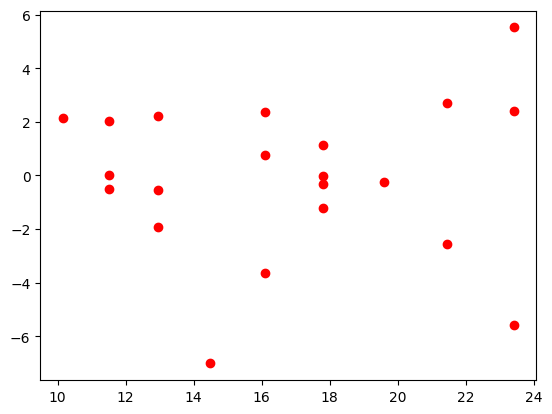

In [269]:
plt.scatter(predR3, (predR3 - data.Y), c='r')

(array([1., 0., 6., 2., 6., 2., 1., 1., 1., 1.]),
 array([-5.51639735, -4.26323758, -3.01007782, -1.75691805, -0.50375828,
         0.74940148,  2.00256125,  3.25572102,  4.50888079,  5.76204055,
         7.01520032]),
 <BarContainer object of 10 artists>)

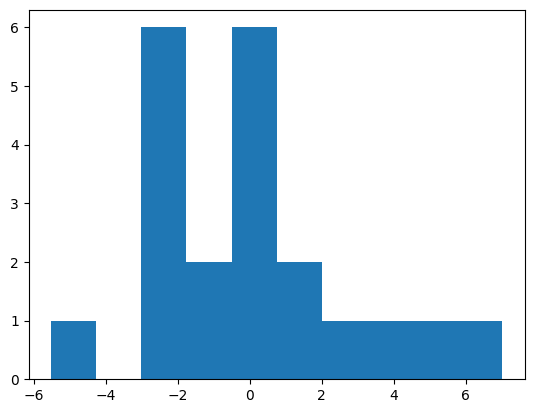

In [270]:
plt.hist(data.Y - predR3)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-7.14104184, -5.27578292, -4.01747053, -2.64831518, -1.64487291,
         -1.64415899, -0.75415899, -0.6011072 , -0.47415899, -0.26487291,
          0.33103626,  0.38252947,  0.67584101,  0.86103626,  1.98252947,
          2.48512709,  2.60168482,  2.72421708,  2.86103626,  3.73668566,
          5.82421708])),
 (3.191432318577361, -6.986641204986392e-15, 0.983529294137017))

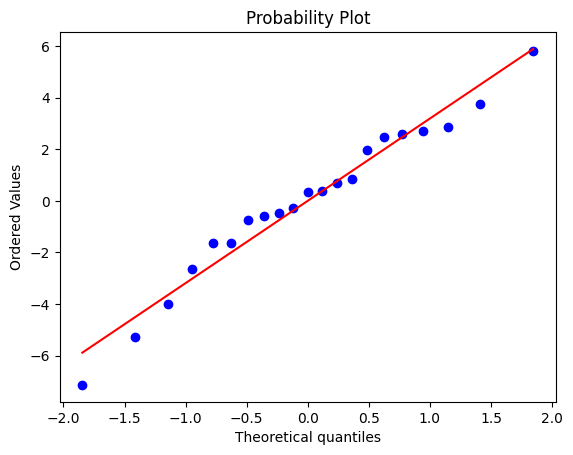

In [271]:
st.probplot((pred3 - data.Y), dist='norm', plot=pylab)

#After performimg various transformation, the linear regression model built using sklearn library with square root transformation on dependent variable gave maximum score of 0.70(70%)

#Salary_hike -> Build a prediction model for Salary_hike
# independent variable(X)= YearsExperience
# dependent variable(Y) = Salary

In [272]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [273]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [274]:
data.shape

(30, 2)

In [275]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [277]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [278]:
data=data.rename({'YearsExperience' : 'X', 'Salary' : 'Y'}, axis=1)

In [279]:
data.head()

,X,Y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [280]:
data.X.skew()

0.37956024064804106

In [281]:
data.Y.skew()

0.35411967922959153

In [282]:
data['logX']=np.log(data.X)
data['sqrt_X']=np.sqrt(data.X)
data['X_square']=np.power(data.X, 2)
data['sqrt_Y']=np.sqrt(data.Y)
data['crt_Y']=np.power(data.Y, 1/3)
data['Log_Y']= np.log(data.Y)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['scaled_y']=scaler.fit_transform(data.Y.values.reshape(-1,1))

In [283]:
data.head()

,X,Y,logX,sqrt_X,X_square,sqrt_Y,crt_Y,Log_Y,scaled_y
0,1.1,39343.0,0.095310,1.048809,1.21,198.350700,34.011242,10.580073,-1.360113
1,1.3,46205.0,0.262364,1.140175,1.69,214.953483,35.883626,10.740843,-1.105527
2,1.5,37731.0,0.405465,1.224745,2.25,194.244691,33.540235,10.538237,-1.419919
3,2.0,43525.0,0.693147,1.414214,4.00,208.626460,35.175984,10.681091,-1.204957
4,2.2,39891.0,0.788457,1.483240,4.84,199.727314,34.168426,10.593906,-1.339781


<ipython-input-284-52a0e6ed0799>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.X)
<ipython-input-284-52a0e6ed0799>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.logX)
<ipython-input-284-52a0e6ed0799>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in se

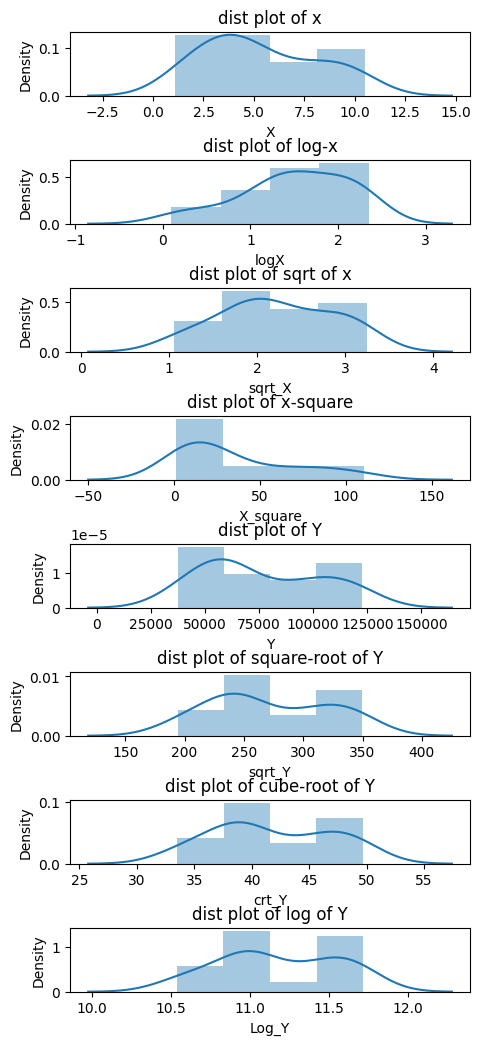

In [284]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=1, bottom=0.3, right=1.5, top=1.5, wspace=3, hspace=1)
plt.subplot(8,1,1)
sns.distplot(data.X)
plt.title('dist plot of x')

plt.subplot(8,1,2)
sns.distplot(data.logX)
plt.title('dist plot of log-x')

plt.subplot(8,1,3)
sns.distplot(data.sqrt_X)
plt.title('dist plot of sqrt of x')

plt.subplot(8,1,4)
sns.distplot(data.X_square)
plt.title('dist plot of x-square')

plt.subplot(8,1,5)
sns.distplot(data.Y)
plt.title('dist plot of Y')

plt.subplot(8,1,6)
sns.distplot(data.sqrt_Y)
plt.title('dist plot of square-root of Y')

plt.subplot(8,1,7)
sns.distplot(data.crt_Y)
plt.title('dist plot of cube-root of Y')

plt.subplot(8,1,8)
sns.distplot(data.Log_Y)
plt.title('dist plot of log of Y')

plt.show();


In [285]:
data.columns

Index(['X', 'Y', 'logX', 'sqrt_X', 'X_square', 'sqrt_Y', 'crt_Y', 'Log_Y',
       'scaled_y'],
      dtype='object')

In [286]:
data.X.skew()

0.37956024064804106

In [287]:
data.logX.skew()

-0.6005648582626513

In [288]:
data.sqrt_X.skew()

-0.04919608394250605

In [289]:
data.Y.skew()

0.35411967922959153

In [290]:
data.Log_Y.skew()

-0.044126086756988495

<ipython-input-291-4da03006e8d9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.scaled_y)


<Axes: xlabel='scaled_y', ylabel='Density'>

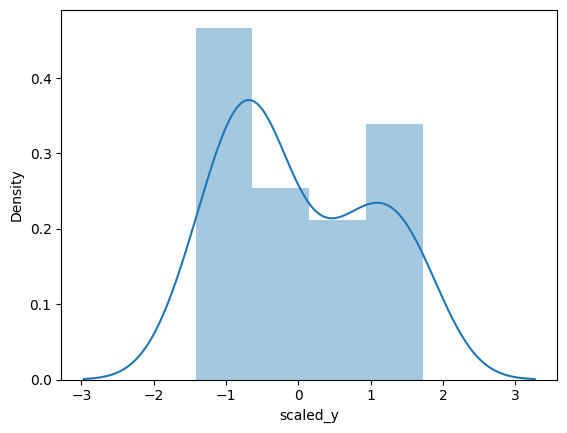

In [291]:
sns.distplot(data.scaled_y)

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb914b276d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb914b27c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb914b27550>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb914960190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb914960430>],
 'means': []}

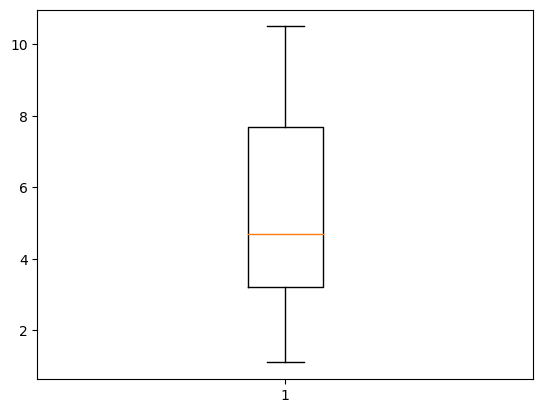

In [292]:
plt.boxplot(data.X)

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb9149a1a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb9149a1f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb9149a1780>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb9149a24a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb9149a2740>],
 'means': []}

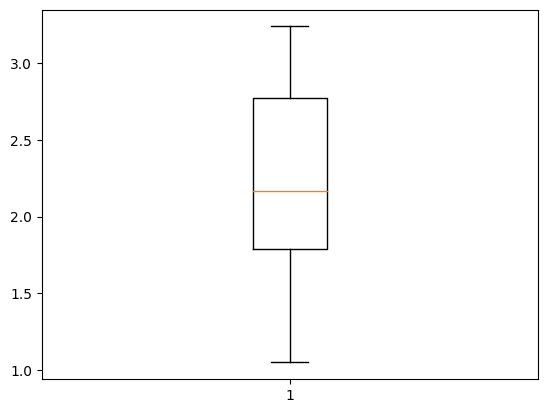

In [293]:
plt.boxplot(data.sqrt_X)

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb9149fbaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb914a2c070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb9149fb970>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb914a2c5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb914a2c850>],
 'means': []}

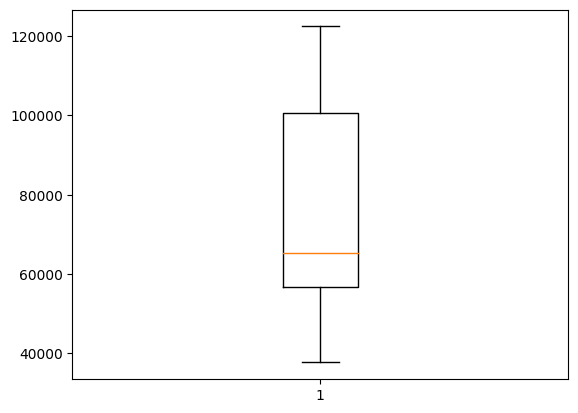

In [294]:
plt.boxplot(data.Y)

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb914875db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb9148762f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb914875b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb914876830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb914876ad0>],
 'means': []}

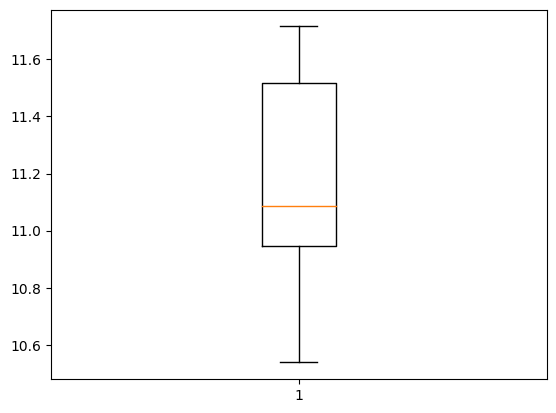

In [295]:
plt.boxplot(data.Log_Y)

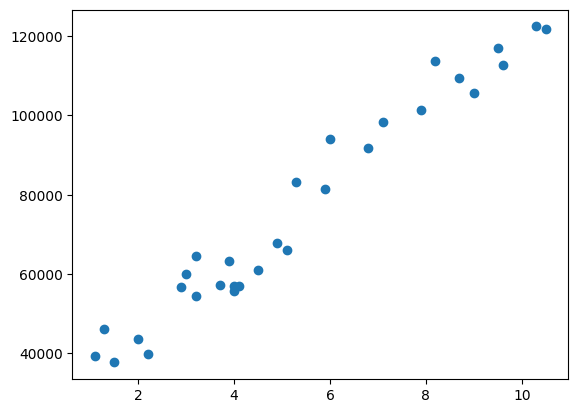

In [296]:
plt.scatter(data.X, data.Y)

In [297]:
data.Y.corr(data.X)

0.9782416184887598

In [298]:
import statsmodels.formula.api as smf
model=smf.ols('Y~X', data=data).fit()
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64

In [299]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        18:08:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
pred=model.predict(data.X)

In [301]:
pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

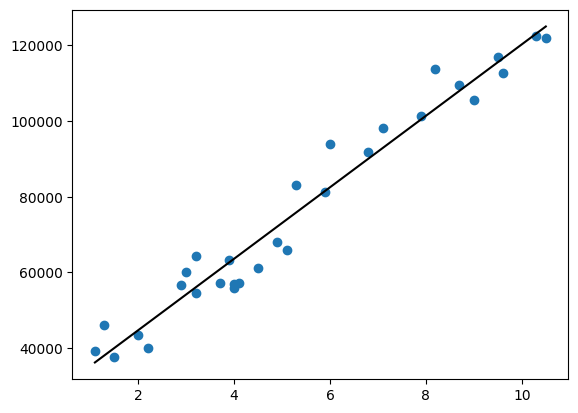

In [302]:
plt.scatter(x='X', y='Y', data=data)
plt.plot(data.X, pred, color='black')

In [303]:
pred.corr(data.Y)

0.9782416184887601

In [304]:
#by performing transformation on x

In [305]:
model2=smf.ols('Y~logX', data=data).fit()
model2.params

Intercept    14927.97177
logX         40581.98796
dtype: float64

In [306]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           3.25e-13
Time:                        18:08:42   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
logX        4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
pred2=model2.predict(data.logX)

In [308]:
pred2.corr(data.Y)

0.924061081788264

<Axes: xlabel='logX', ylabel='Y'>

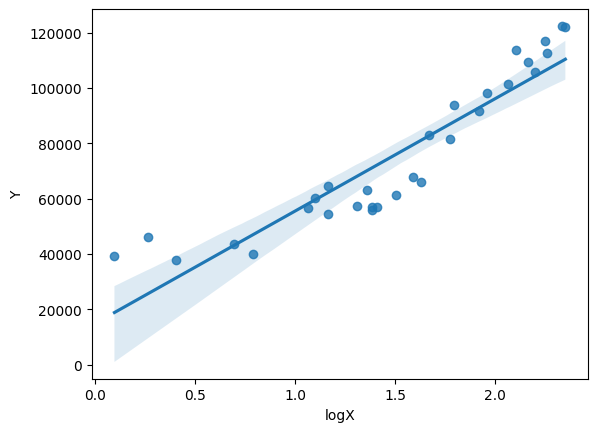

In [309]:
sns.regplot(x='logX', y='Y', data=data)

In [310]:
# model between square-root x and Y
model3= smf.ols('Y~sqrt_X', data=data).fit()
model3.params

Intercept   -16055.769117
sqrt_X       41500.680583
dtype: float64

In [311]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           8.57e-18
Time:                        18:08:43   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_X       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
pred3=model3.predict(data.sqrt_X)
pred3.head()

0    27470.511884
1    31262.287009
2    34771.976586
3    42635.056211
4    45499.687794
dtype: float64

In [313]:
pred3.corr(data.Y)

0.9648839072651968

<Axes: xlabel='sqrt_X', ylabel='Y'>

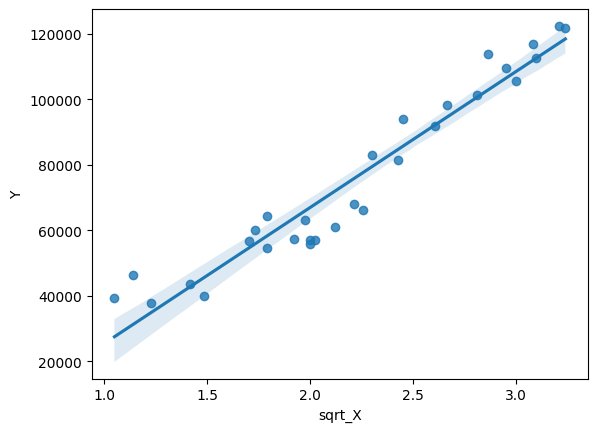

In [314]:
sns.regplot(x='sqrt_X', y='Y', data=data)

In [315]:
model4=smf.ols('Y~X_square', data=data).fit()
model4.params

Intercept    48042.585515
X_square       776.318773
dtype: float64

In [316]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.52e-16
Time:                        18:08:43   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
X_square     776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
pred4= model4.predict(data.X_square)
pred4.corr(data.Y)

0.9567235158525461

# by performing transformations on X the accuarcy of the model is decreasing


In [318]:
#by performing transformations on Y
data.columns

Index(['X', 'Y', 'logX', 'sqrt_X', 'X_square', 'sqrt_Y', 'crt_Y', 'Log_Y',
       'scaled_y'],
      dtype='object')

In [319]:
model5= smf.ols('sqrt_Y~X', data=data).fit()
model5.params

Intercept    180.700221
X             17.056532
dtype: float64

In [320]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sqrt_Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           9.78e-20
Time:                        18:08:43   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
X             17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
pred5 = (model5.predict(data.X))**2
pred5.head()

0    39785.251671
1    41157.743455
2    42553.509262
3    46144.747630
4    47621.972517
dtype: float64

In [322]:
data.Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Y, dtype: float64

In [323]:
pred5.corr(data.Y)

0.975667958482276

<Axes: xlabel='X', ylabel='sqrt_Y'>

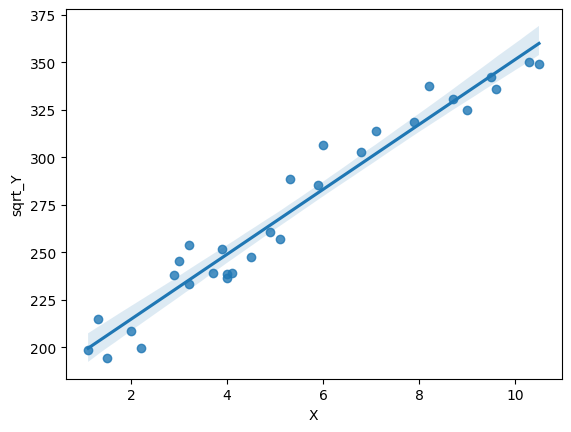

In [324]:
sns.regplot(x='X', y='sqrt_Y', data=data)

In [325]:
model6 = smf.ols('crt_Y~X', data=data).fit()
model6.params

Intercept    32.453864
X             1.751471
dtype: float64

In [326]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crt_Y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     482.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           3.42e-19
Time:                        18:08:43   Log-Likelihood:                -47.463
No. Observations:                  30   AIC:                             98.93
Df Residuals:                      28   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.4539      0.479     67.821      0.000      31.474      33.434
X              1.7515      0.080     21.966      0.000       1.588       1.915
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.611
Skew:                           0.385   Prob(JB):                        0.447
Kurtosis:                       2.166   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
pred6= (model6.predict(data.X))**3
pred6.corr(data.Y)

0.9732795419160649

<Axes: xlabel='X', ylabel='crt_Y'>

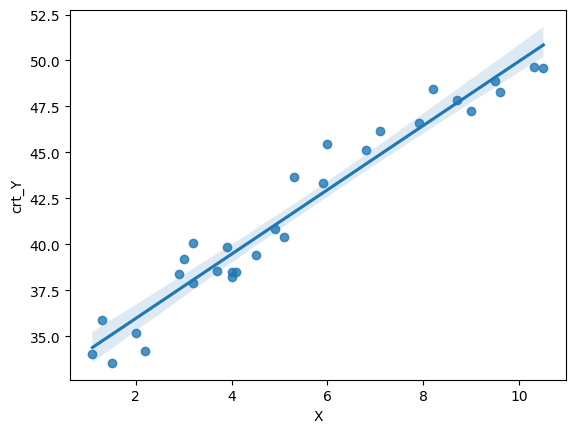

In [328]:
sns.regplot(x='X', y='crt_Y', data=data)

In [329]:
model7 = smf.ols('Log_Y~X', data=data).fit()
model7.params

Intercept    10.507402
X             0.125453
dtype: float64

In [330]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Log_Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           7.03e-18
Time:                        18:08:44   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
X              0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
pred7= np.exp(model7.predict(data.X))

In [332]:
pred7.head()

0    41998.957468
1    43066.066794
2    44160.289228
3    47019.029189
4    48213.688474
dtype: float64

In [333]:
data.Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Y, dtype: float64

In [334]:
pred7.corr(data.Y)

0.9660469705377086

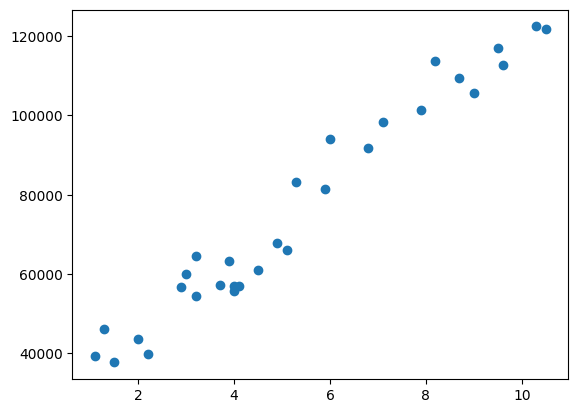

In [335]:
#using sklearn library
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
plt.scatter(data.X, data.Y)

In [336]:
reg1.fit(data.X.values.reshape(-1,1), data.Y)
reg1.score(data.X.values.reshape(-1,1), data.Y)

0.9569566641435086

In [337]:
print(reg1.coef_)
print(reg1.intercept_)

[9449.96232146]
25792.200198668696


In [338]:
pr1= reg1.predict(data.X.values.reshape(-1,1))
RMSE1= np.sqrt(np.mean((pr1-data.Y)**2))
RMSE1

5592.043608760661

In [339]:
pr1

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [340]:
data.Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Y, dtype: float64

Text(0, 0.5, 'error')

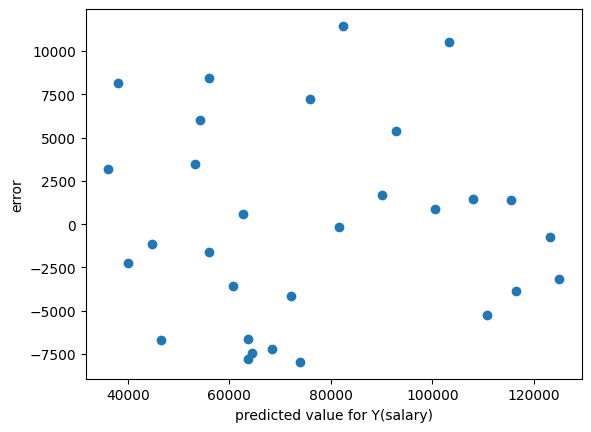

In [341]:
plt.scatter(pr1, (data.Y- pr1))
plt.xlabel('predicted value for Y(salary)')
plt.ylabel('error')

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-7958.00803809, -6017.40464702, -4076.80125595, -2136.19786488,
         -195.59447381,  1745.00891726,  3685.61230832,  5626.21569939,
         7566.81909046,  9507.42248153, 11448.0258726 ]),
 <BarContainer object of 10 artists>)

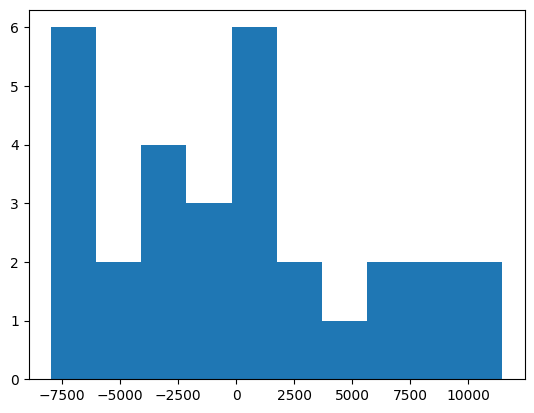

In [342]:
plt.hist(data.Y- pr1)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-7958.00803809, -7798.04948449, -7456.04571663, -7206.03064522,
         -6691.11730587, -6635.04948449, -5259.86109176, -4159.0155738 ,
         -3876.83848464, -3568.06078805, -3144.80457395, -2236.14368085,
         -1587.07962732, -1167.12484158,  -735.81210966,  -183.97789525,
           570.94674766,   855.09746184,  1402.15774751,  1424.12760467,
          1686.05601544,  3155.84124773,  3444.90906911,  5386.067319  ,
          6007.91283697,  7210.99949762,  8127.84878344,  8412.92037268,
         10530.1087654 , 11448.0258726 ])),

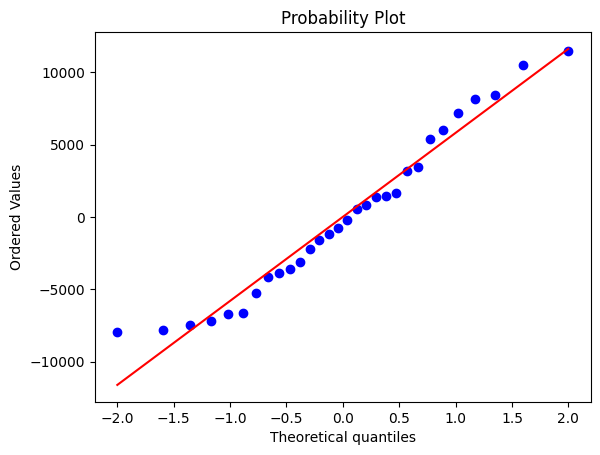

In [343]:
import pylab
import scipy.stats as st
st.probplot((data.Y- pr1),dist='norm', plot=pylab )

In [344]:
data.columns

Index(['X', 'Y', 'logX', 'sqrt_X', 'X_square', 'sqrt_Y', 'crt_Y', 'Log_Y',
       'scaled_y'],
      dtype='object')

In [345]:
reg2= LinearRegression()
reg2.fit(data.sqrt_X.values.reshape(-1,1), data.Y)
reg2.score(data.sqrt_X.values.reshape(-1,1), data.Y)


0.9310009544993526

In [346]:
print(reg2.intercept_)
print(reg2.coef_)

-16055.769116956377
[41500.68058303]


In [347]:
pr2= reg2.predict(data.sqrt_X.values.reshape(-1,1))
pr2

array([ 27470.5118836 ,  31262.2870087 ,  34771.97658636,  42635.05621127,
        45499.6877937 ,  54617.34329277,  55825.51820153,  58182.90519996,
        58182.90519996,  63772.38386657,  65901.50820807,  66945.59204909,
        66945.59204909,  67976.7043936 ,  71980.46887539,  75809.90344568,
        77665.96311819,  79485.97249857,  84749.03376584,  85599.72228969,
        92164.76555281,  94526.21888681, 100589.93917079, 102784.09460143,
       106353.65230571, 108446.27263212, 111857.91914242, 112529.38668651,
       117134.90936769, 118421.80571606])

In [348]:
data.Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Y, dtype: float64

In [349]:
RMSE2=np.sqrt(np.mean((data.Y-pr2)**2))
RMSE2

7080.095734983039

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11636.96311819, -11151.59204909, -10895.7043936 , -10869.46887539,
          -9988.59204909,  -7871.90344568,  -6583.38386657,  -5608.6877937 ,
          -3737.90519996,  -3386.03376584,  -2864.27263212,  -2683.50820807,
           -426.76555281,    105.61331349,    712.06082921,    889.94378873,
           2024.65670723,   2959.02341364,   3077.34769429,   3450.19428394,
           3602.02750143,   3746.78111319,   4324.48179847,   5111.08085758,
           5256.09063231,   6262.09480004,   8340.27771031,  11027.90539857,
          11872

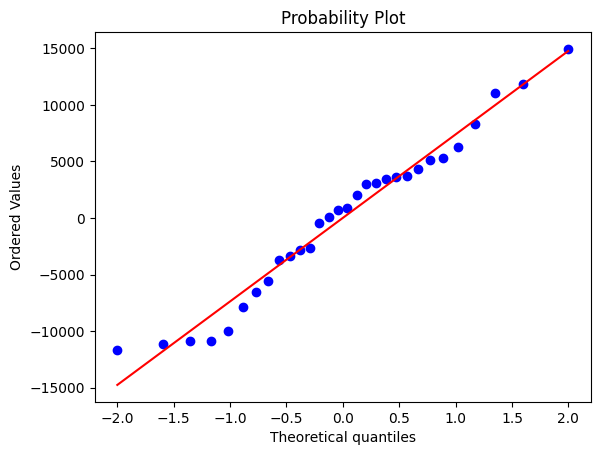

In [350]:
st.probplot((data.Y- pr2),dist='norm', plot=pylab )

In [351]:
data.columns

Index(['X', 'Y', 'logX', 'sqrt_X', 'X_square', 'sqrt_Y', 'crt_Y', 'Log_Y',
       'scaled_y'],
      dtype='object')

In [352]:
reg3=LinearRegression()
reg3.fit(data.X.values.reshape(-1,1), data.sqrt_Y)
reg3.score(data.X.values.reshape(-1,1), data.sqrt_Y)

0.9498353533865289

In [353]:
reg3.coef_

array([17.05653205])

In [354]:
reg3.intercept_

180.70022140543102

In [355]:
data.sqrt_Y.head()

0    198.350700
1    214.953483
2    194.244691
3    208.626460
4    199.727314
Name: sqrt_Y, dtype: float64

In [356]:
pr3=reg3.predict(data.X.values.reshape(-1,1))
pr3

array([199.46240666, 202.87371307, 206.28501948, 214.81328551,
       218.22459192, 230.16416435, 231.86981756, 235.28112397,
       235.28112397, 243.80938999, 247.2206964 , 248.92634961,
       248.92634961, 250.63200281, 257.45461563, 264.27722845,
       267.68853486, 271.09984127, 281.3337605 , 283.03941371,
       296.68463935, 301.80159896, 315.4468246 , 320.56378422,
       329.09205024, 334.20900986, 342.73727588, 344.44292909,
       356.38250152, 359.79380793])

In [357]:
data.Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Y, dtype: float64

In [358]:
pr3= pr3**2

In [359]:
pr3

array([ 39785.25167088,  41157.74345511,  42553.50926219,  46144.74762985,
        47621.97251689,  52975.54255146,  53763.61229353,  55357.2072948 ,
        55357.2072948 ,  59443.01864794,  61118.07272918,  61964.32752837,
        61964.32752837,  62816.40083327,  66282.87910997,  69842.45347807,
        71657.15169638,  73495.12393755,  79148.68479812,  80111.30971154,
        88021.7752245 ,  91084.20513611,  99506.6991517 , 102761.13975179,
       108301.57753284, 111695.66227   , 117468.84027951, 118640.93139855,
       127008.48739174, 129451.58422691])

In [360]:
RMSE3= np.sqrt(np.mean((data.Y-pr3)**2))
RMSE3

5926.008666359516

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-7730.97251689, -7579.58422691, -6170.32752837, -6113.66227   ,
         -6005.93139855, -5735.40083327, -5628.15169638, -5171.87910997,
         -5007.32752837, -4822.50926219, -4617.48739174, -2619.74762985,
         -2254.01864794, -1904.45347807,  -912.2072948 ,  -499.84027951,
          -442.25167088,  1129.42246716,  1795.3008483 ,  2099.92727082,
          2214.31520188,  3666.45744854,  3716.2247755 ,  5047.25654489,
          6386.38770647,  7188.79486389,  9087.7927052 ,  9592.87606245,
         11050.86024821, 13828.69028846])),

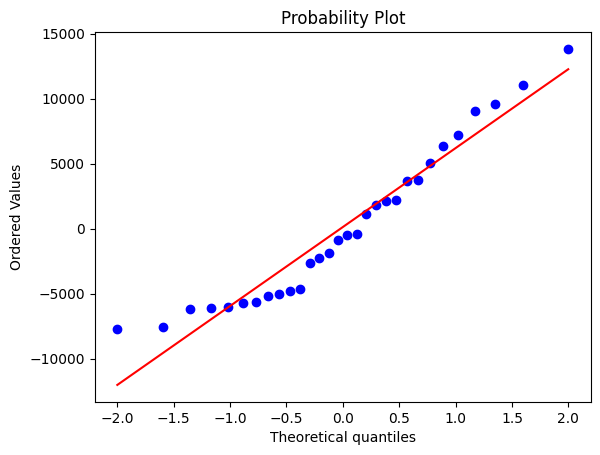

In [361]:
st.probplot(data.Y-pr3, dist='norm', plot=pylab)

#Highest accuracy of 95.7% was showed by the model when both x and y were used without any transformation and 95% was obtained by applying square root on y.
#The results didn't vary and remain same by using both sklearn and scipy.stats model